In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
#from sklearn.feature_selection import SelectKBest,f_regression,rfe

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
data=pd.read_csv('CarPrice_Assignment.csv')


In [4]:
df=pd.DataFrame(data)

In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df=df.drop('CarName',axis=1)

In [7]:
df.head(10)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# Check for duplicate rows
dup_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

Number of duplicate rows: 0


In [12]:
#Handle categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
categorical_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [13]:
# Step 4: Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

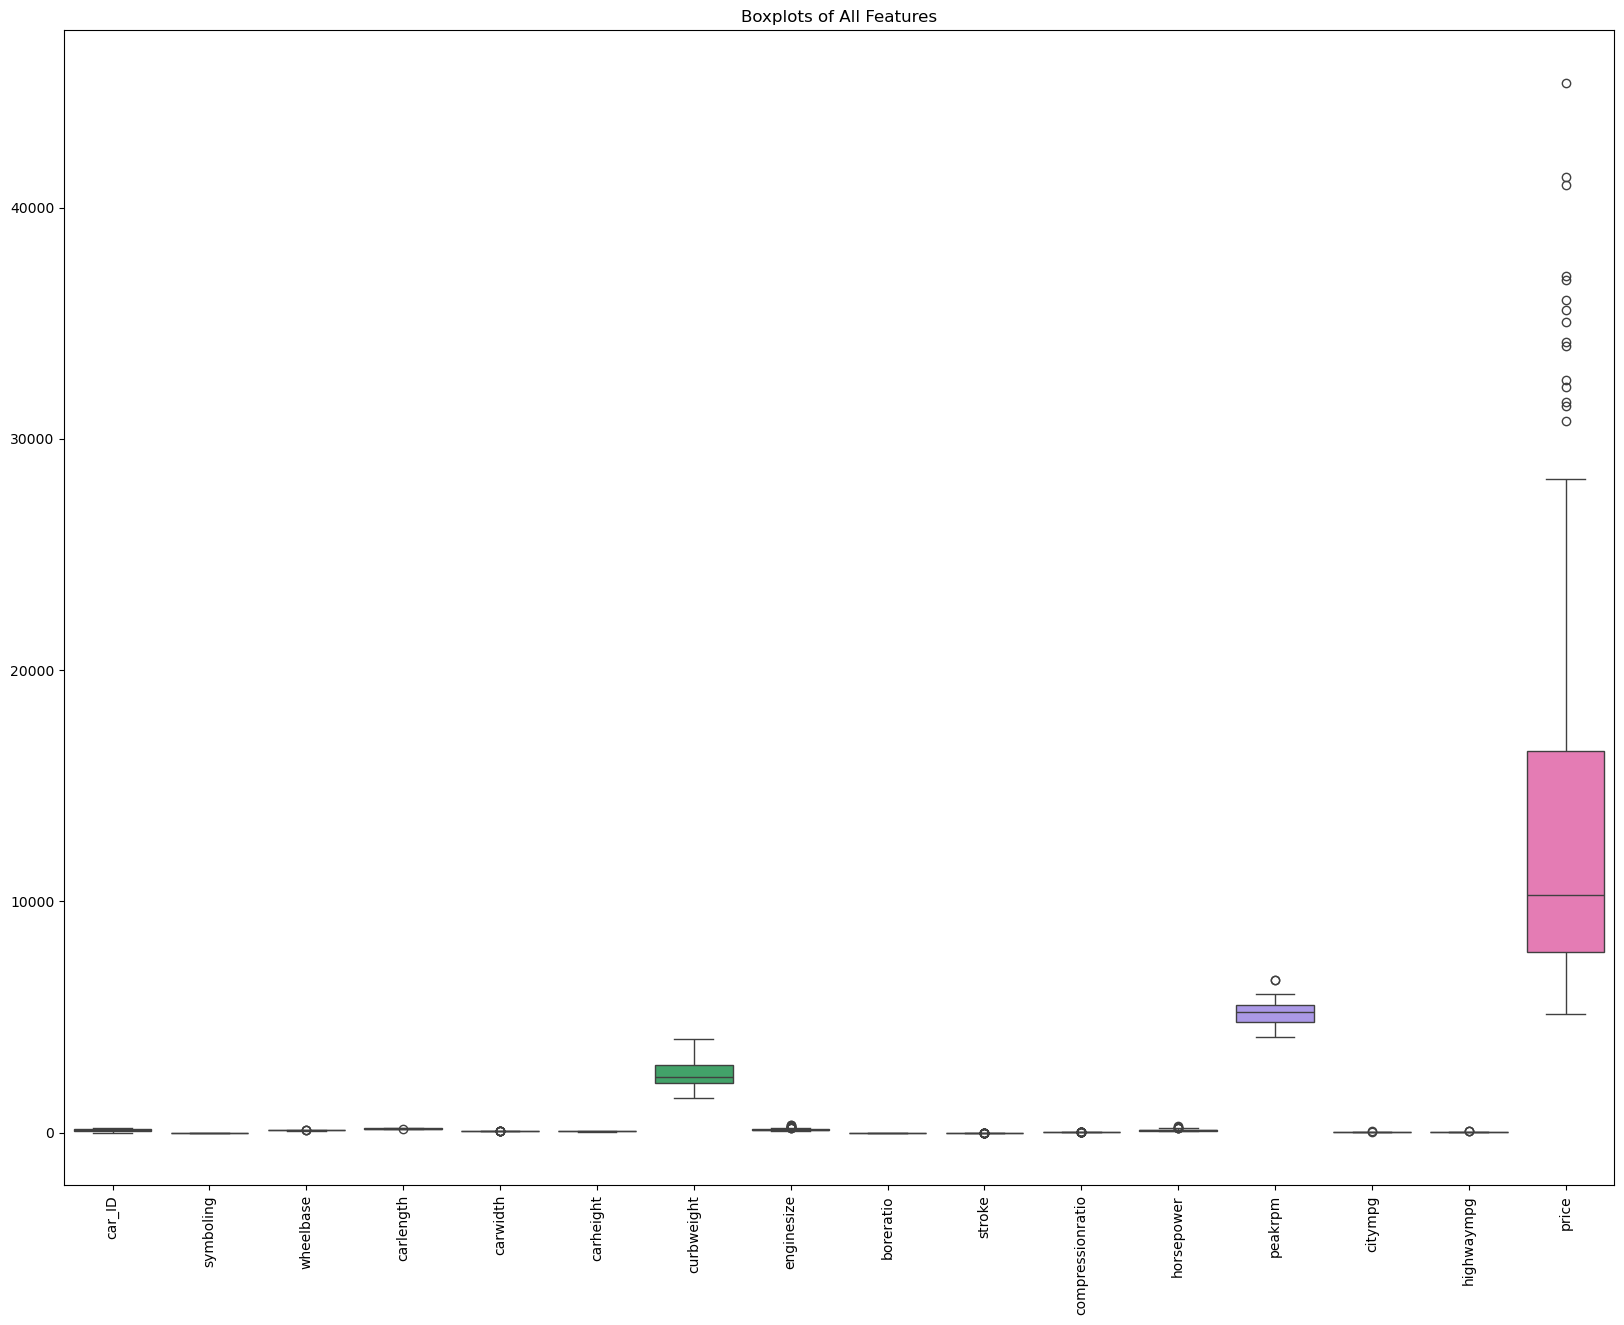

In [14]:
# Plot boxplots for all features)
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.title("Boxplots of All Features")
plt.xticks(rotation=90) 
plt.show()

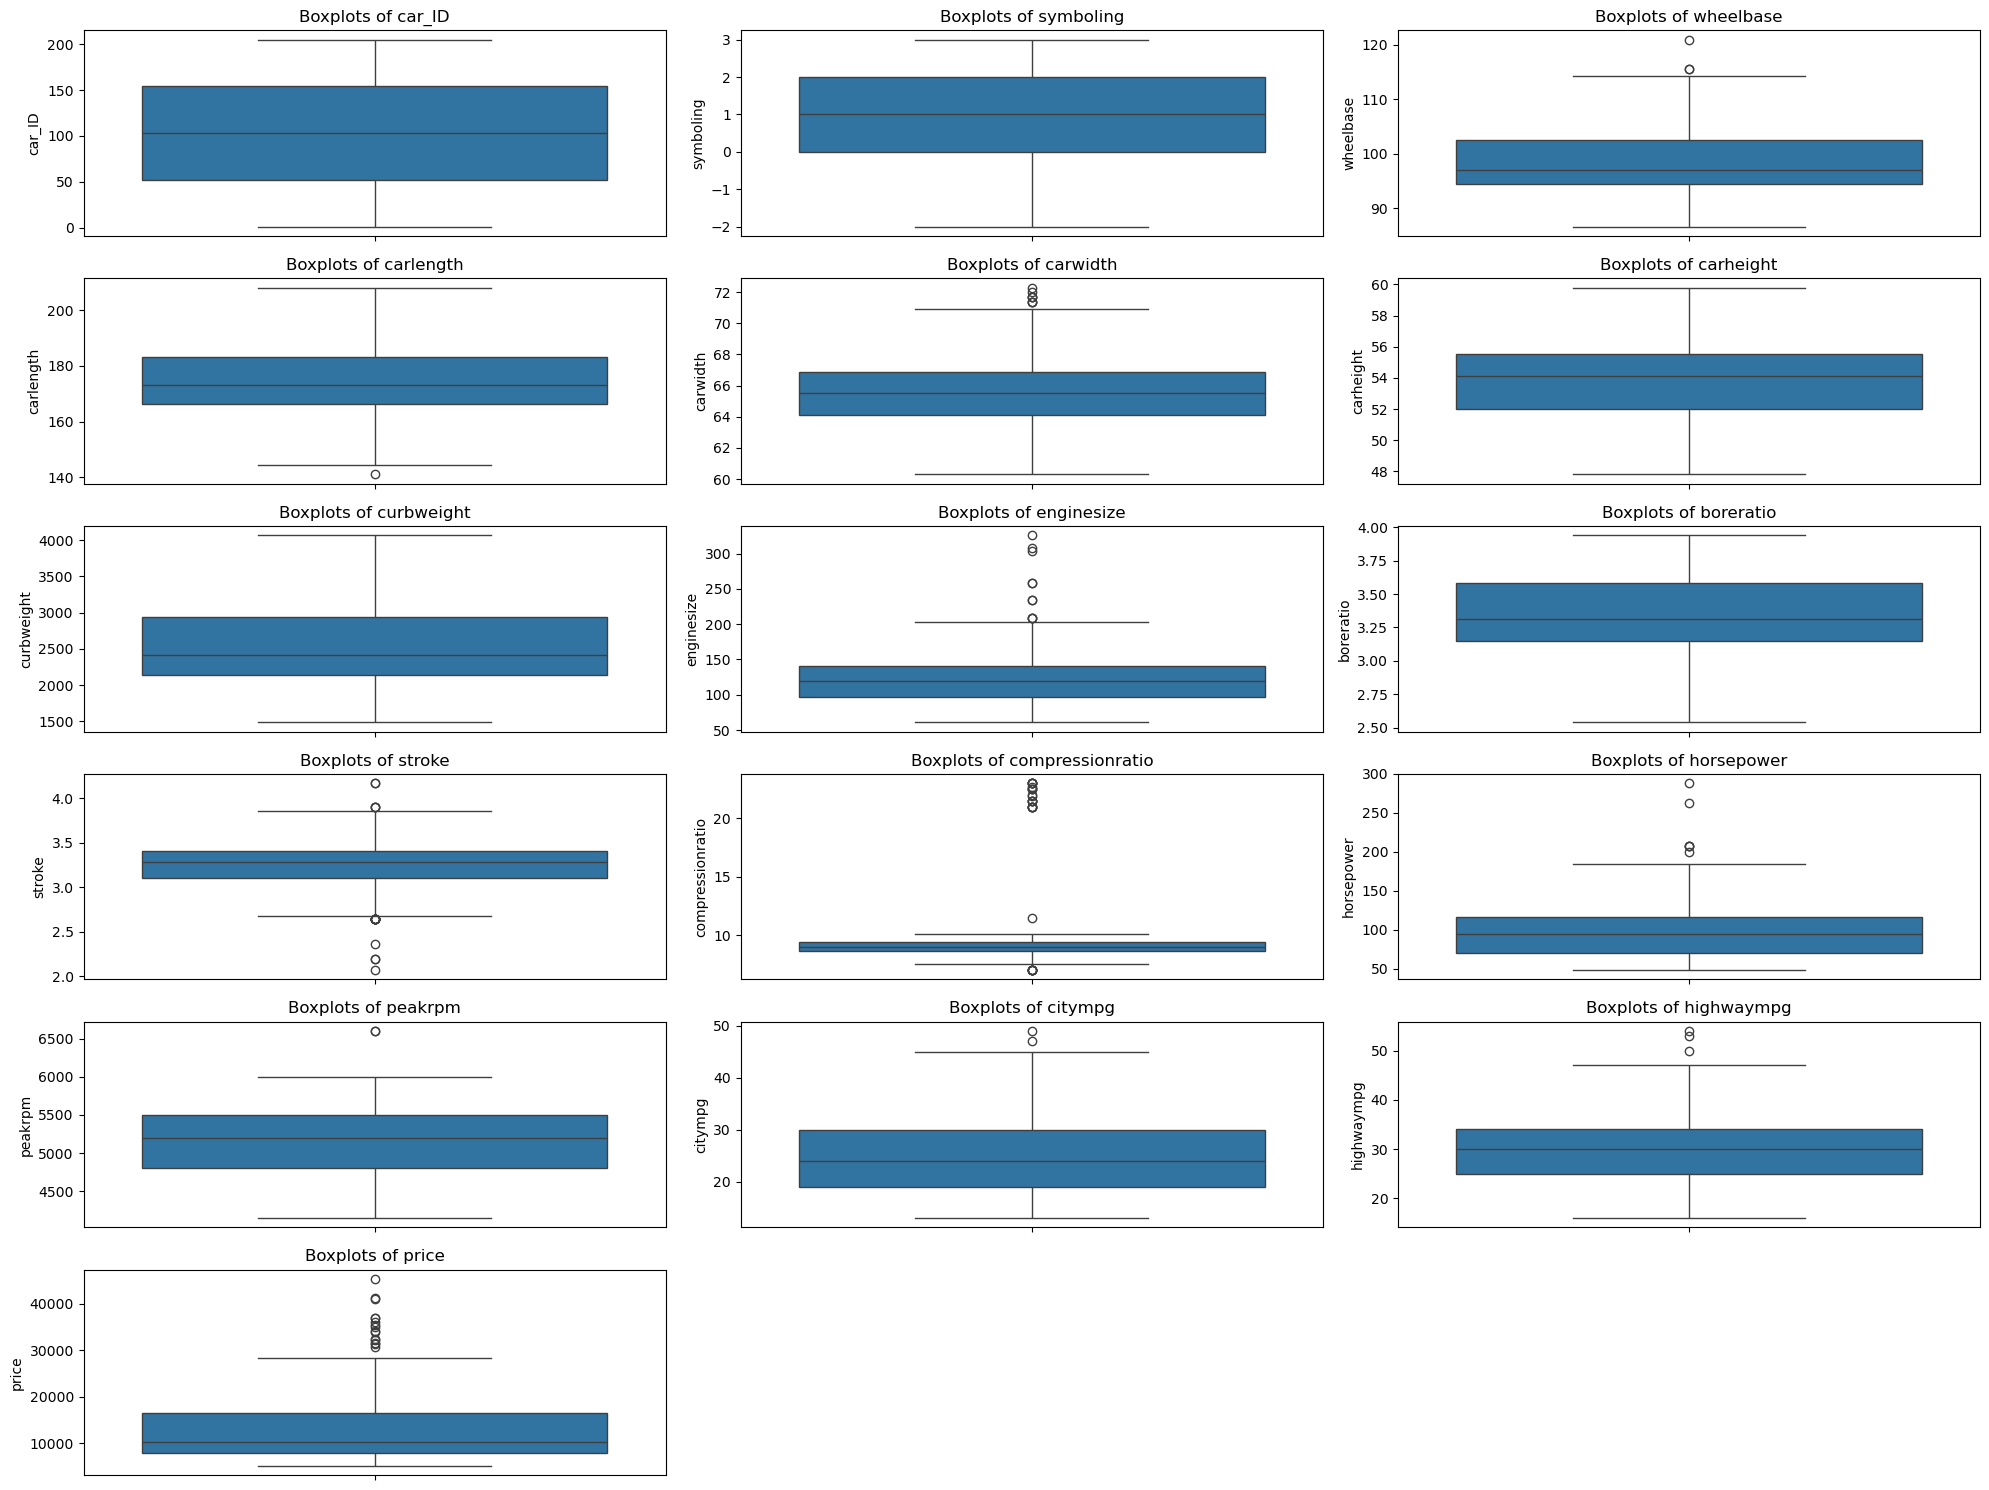

In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df,y=column) 
    plt.title(f"Boxplots of {column}")  
    plt.tight_layout()

plt.show()

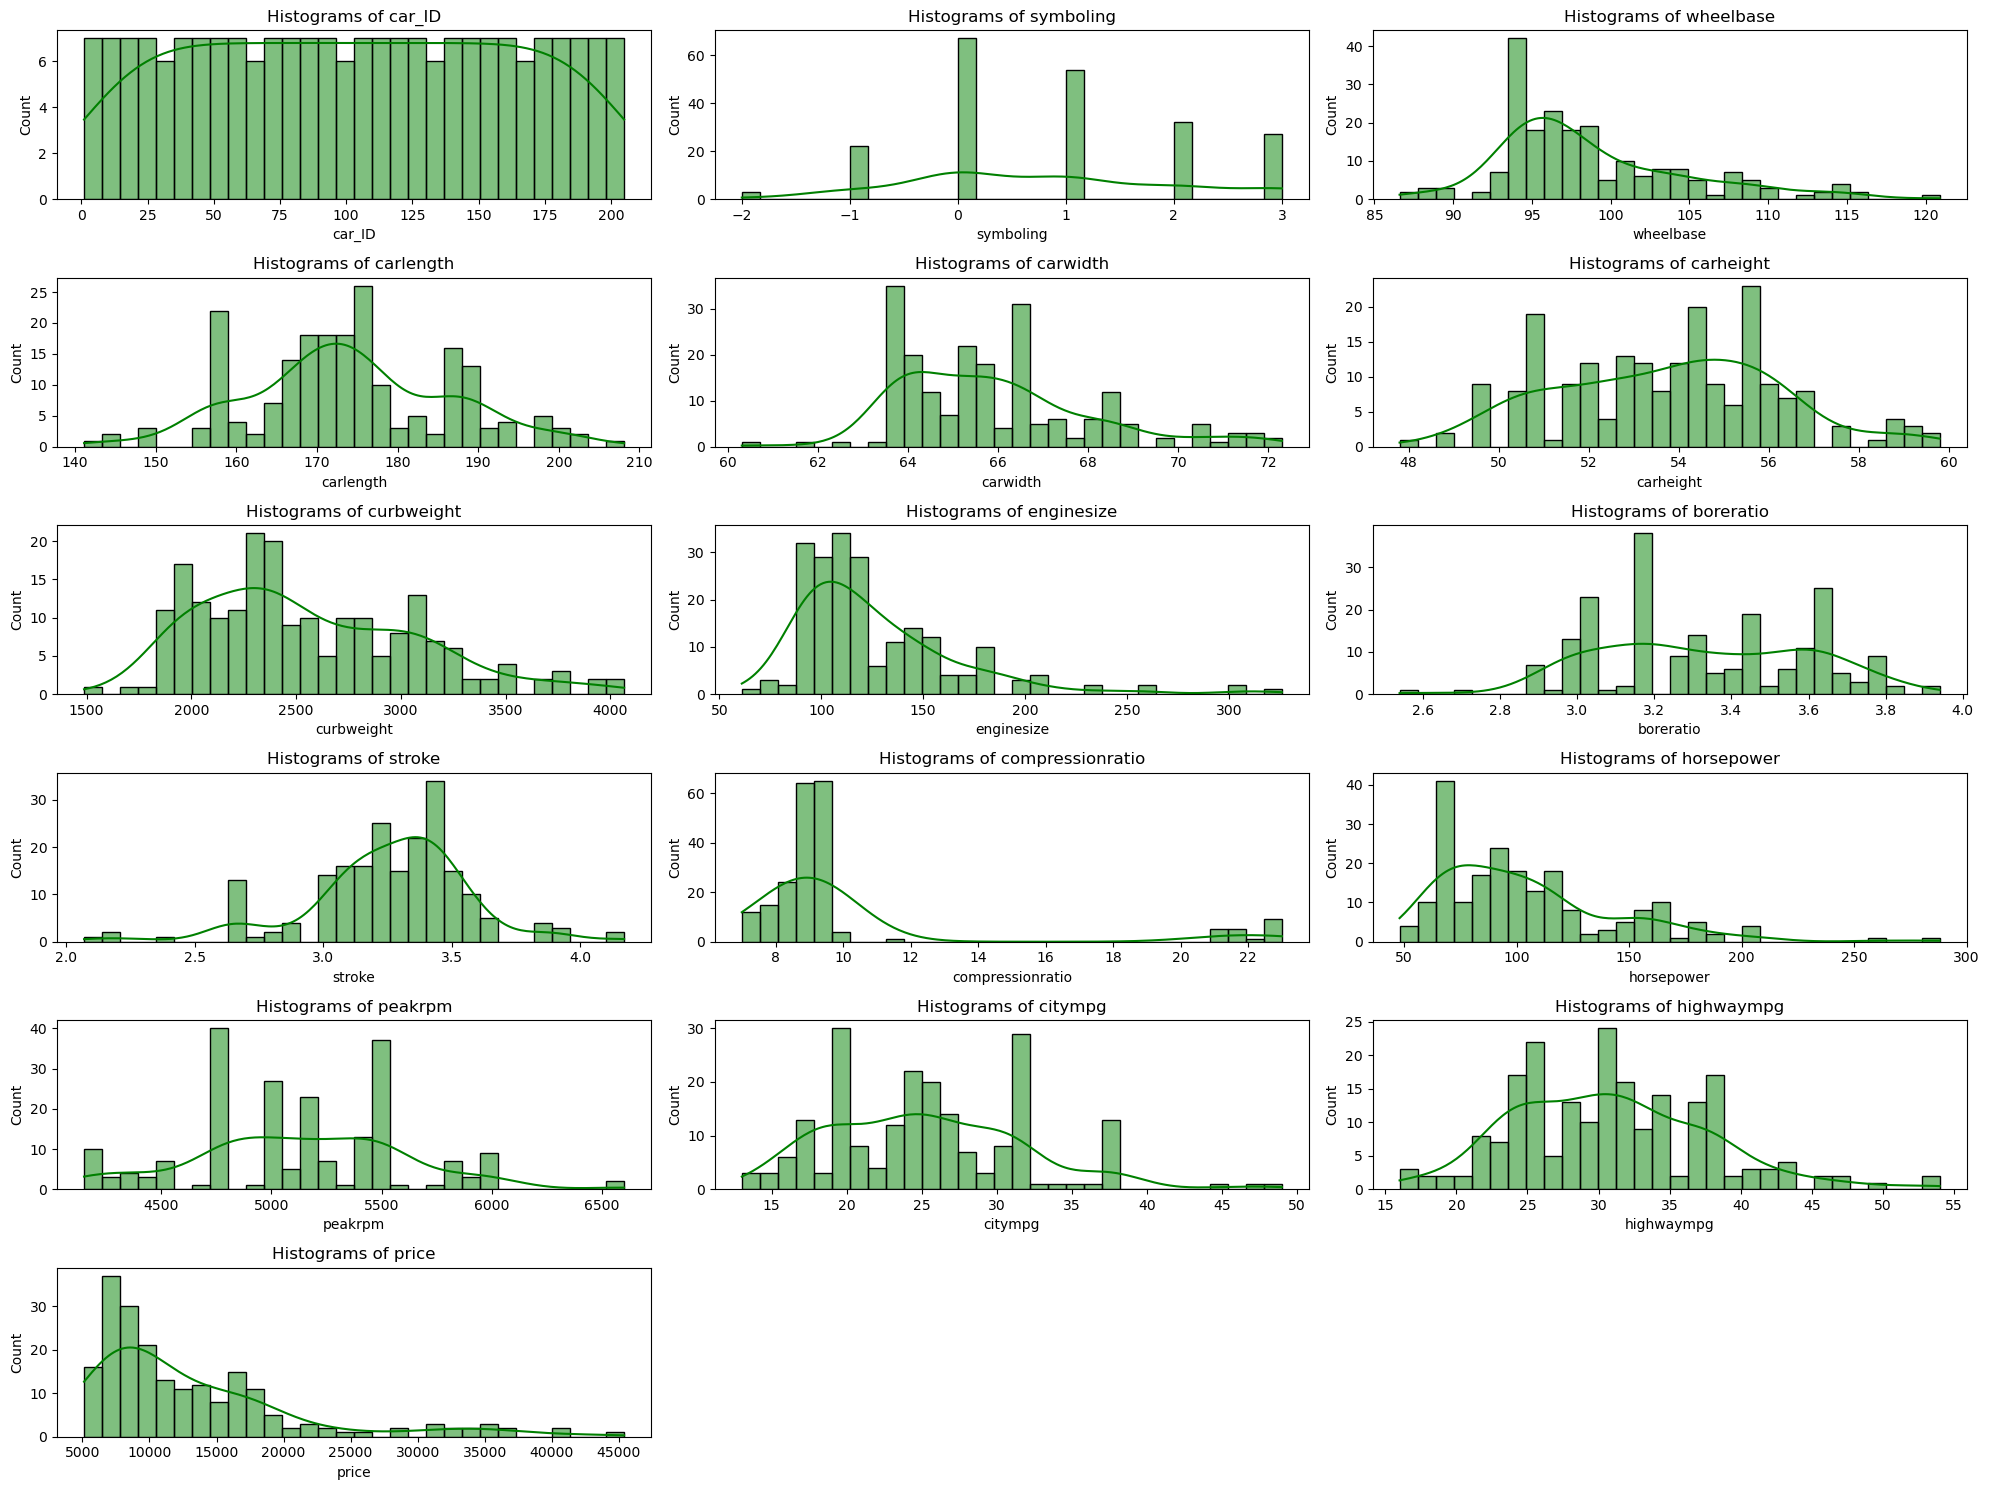

In [16]:
#Histogram
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.histplot(data=df,x=column,kde=True,color='green',bins=30) 
    plt.title(f"Histograms of {column}")  
    plt.tight_layout()

plt.show()


In [17]:
# Function to handle outliers using IQR
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
def handle_outliers_iqr(df,column):
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
        
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
            return outliers
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Detect outliers for each numerical column
outliers_dict = {}
for column in numerical_columns:
    outliers = handle_outliers_iqr(df, column)
    outliers_dict[column] = len(outliers)

# Display the number of outliers for each numerical column
for column, count in outliers_dict.items():
    print(f"Column '{column}' has {count} outliers.")


Column 'car_ID' has 0 outliers.
Column 'symboling' has 0 outliers.
Column 'wheelbase' has 3 outliers.
Column 'carlength' has 1 outliers.
Column 'carwidth' has 8 outliers.
Column 'carheight' has 0 outliers.
Column 'curbweight' has 0 outliers.
Column 'enginesize' has 10 outliers.
Column 'boreratio' has 0 outliers.
Column 'stroke' has 20 outliers.
Column 'compressionratio' has 28 outliers.
Column 'horsepower' has 6 outliers.
Column 'peakrpm' has 2 outliers.
Column 'citympg' has 2 outliers.
Column 'highwaympg' has 3 outliers.
Column 'price' has 15 outliers.


In [18]:
#Capping Outliers
df_cleaned=df.copy()
outliercolumns=['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower',
                'peakrpm','citympg','highwaympg','price']
for column in outliercolumns:
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned[column]=df_cleaned[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

df_cleaned

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145.0,idi,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0


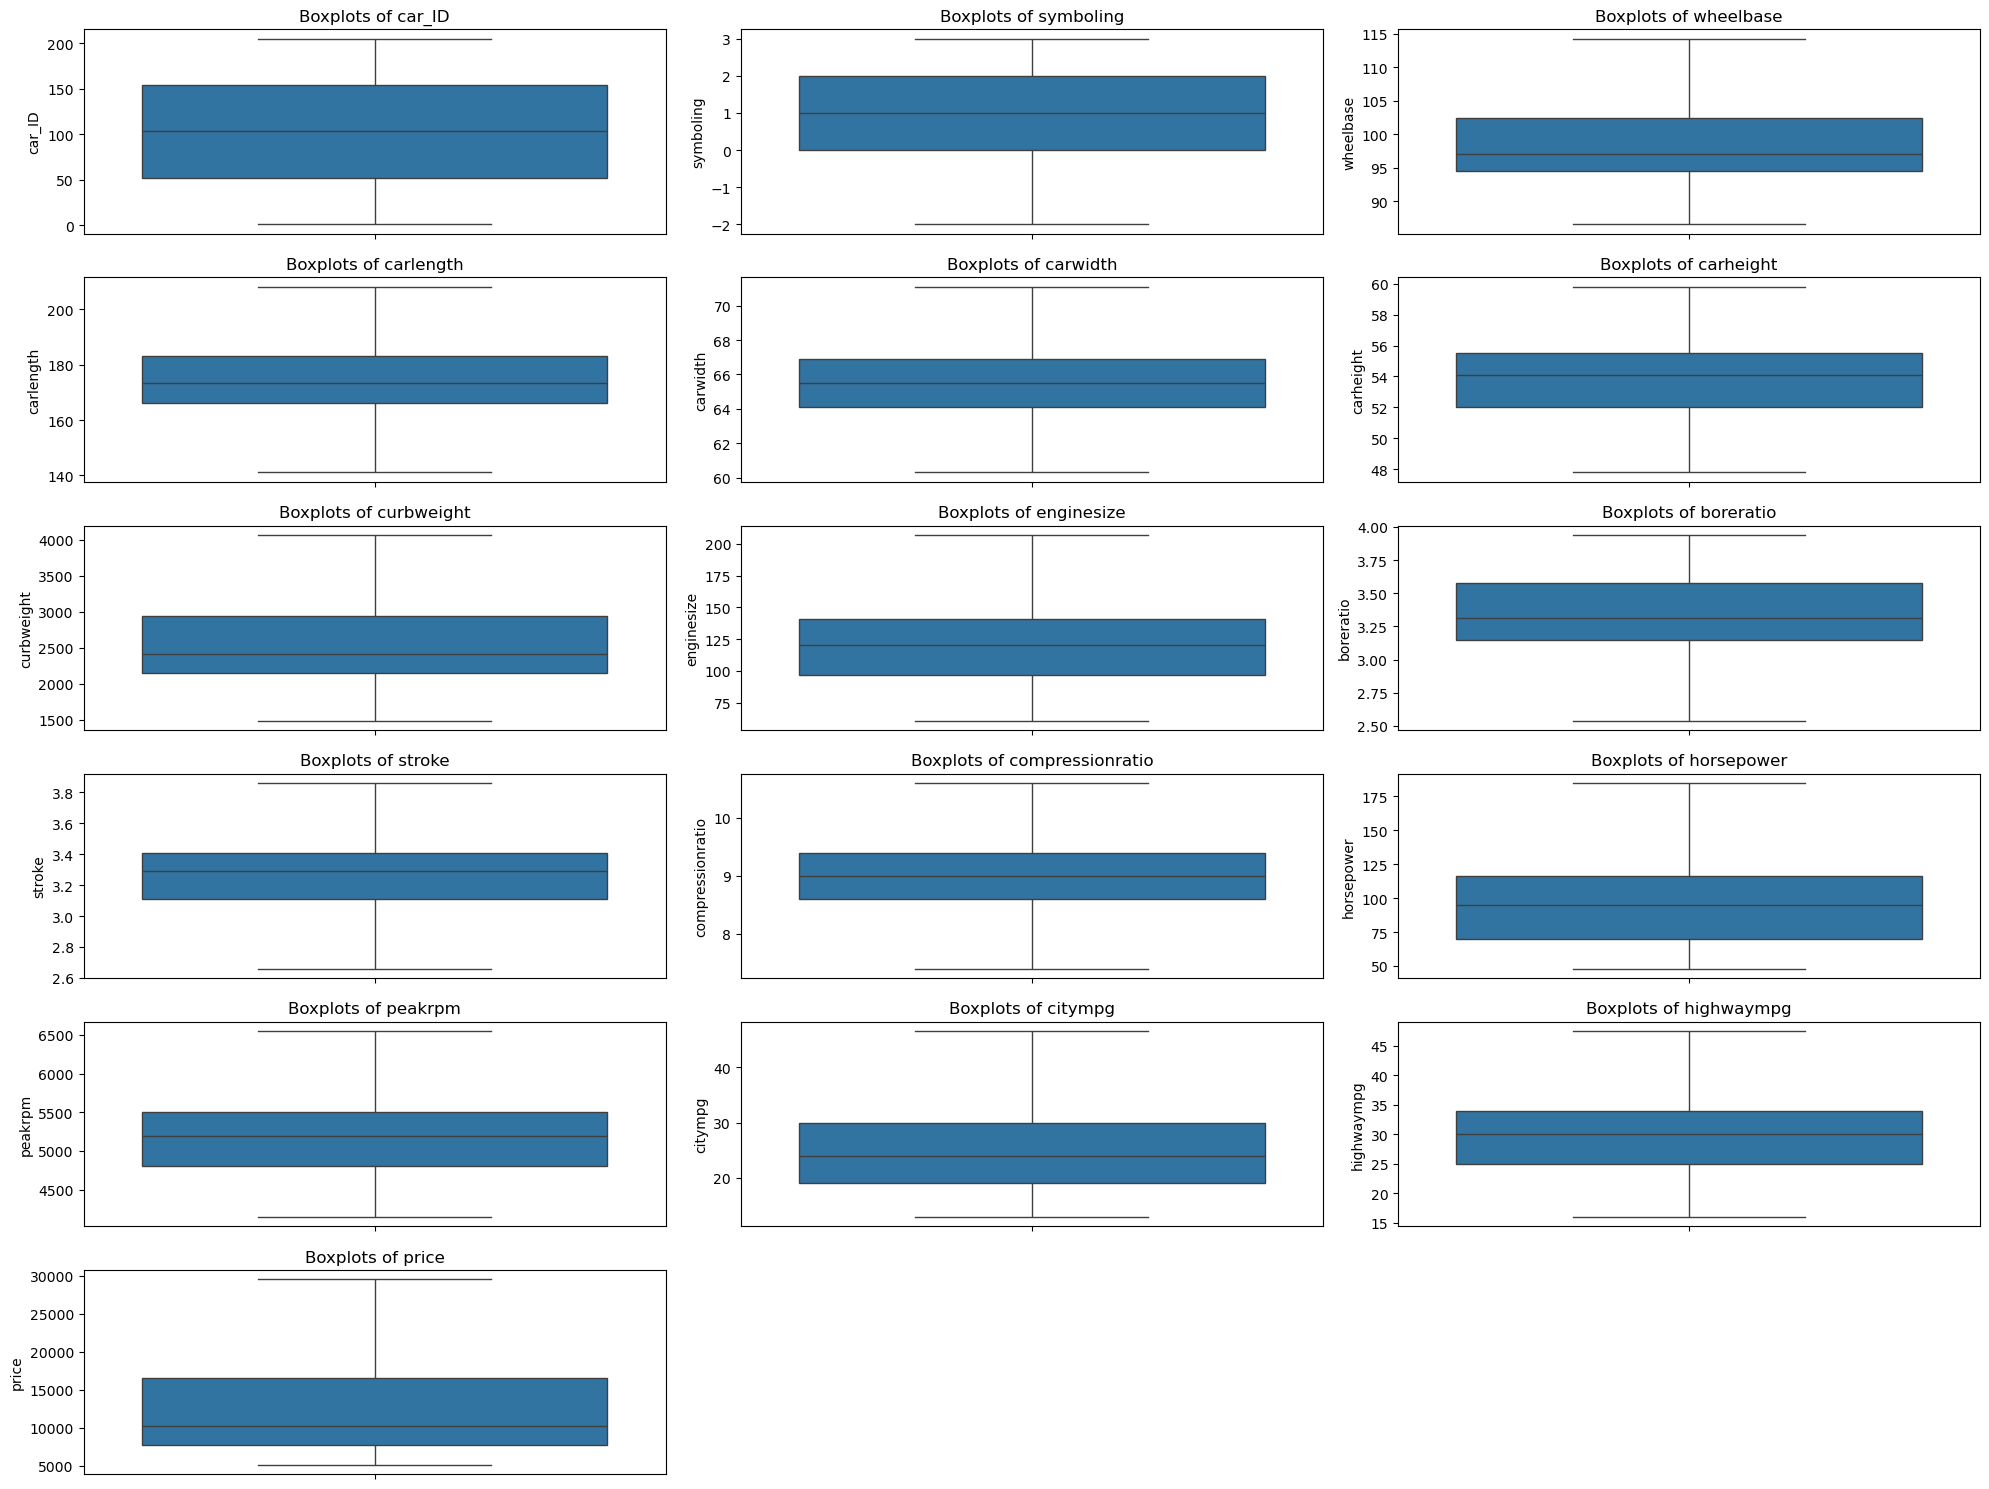

In [19]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df_cleaned,y=column) 
    plt.title(f"Boxplots of {column}")  
    plt.tight_layout()

plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    float64
 16  fuelsystem        205 non-null    object 
 1

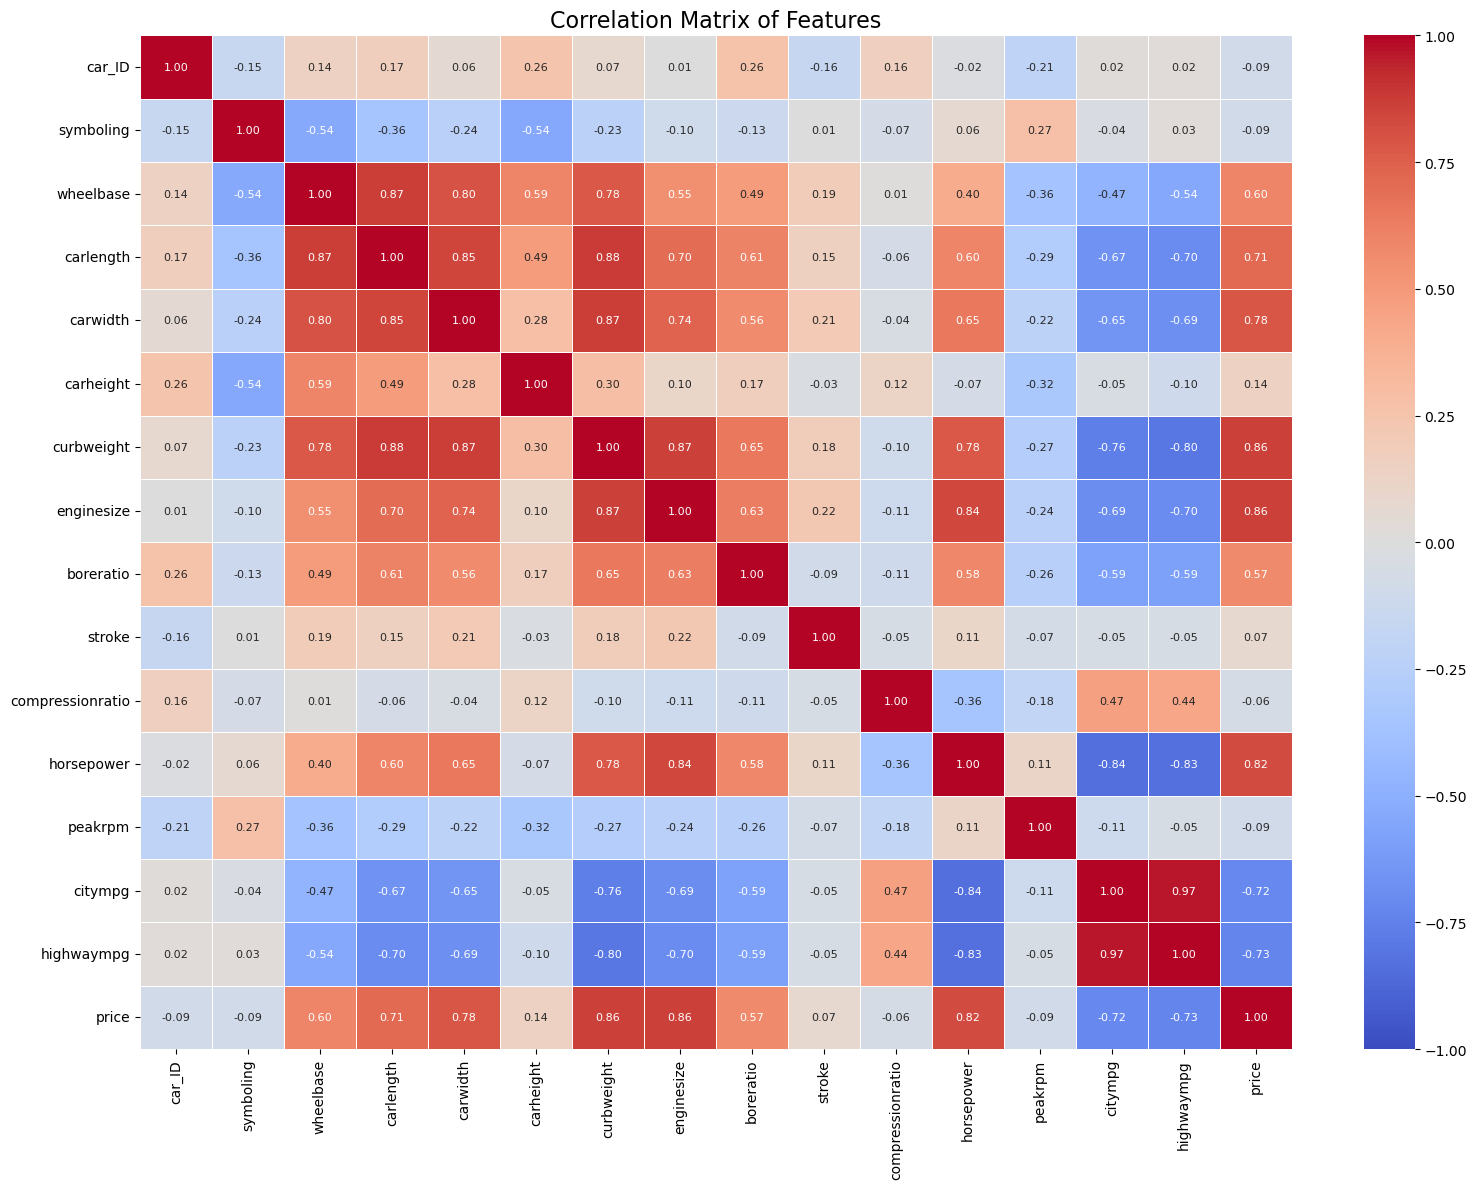

In [22]:
df_1= df_cleaned.select_dtypes(include=['number'])
corr_matrix =df_1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
annot_kws={"size": 8},
vmin=-1, vmax=1)

plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90) # Rotate x-axis labels
plt.yticks(rotation=0) # Rotate y-axis labels
plt.tight_layout() # Ensure everything fits in the figure
# Show the plot
plt.show()


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    float64
 16  fuelsystem        205 non-null    object 
 1

In [24]:
#Encoding....
le=LabelEncoder()
#Label Encoding for Symboling column--ordinal data
df_cleaned['symboling']=le.fit_transform(df_cleaned['symboling'])
#onehot Encoding for Categorical column--ordinal data
df_cleaned=pd.get_dummies(df_cleaned,columns=['fueltype','aspiration','doornumber','carbody',
                   'drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)
df_cleaned.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,5,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,5,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,3,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,4,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,4,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    float64
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    float64
 12  peakrpm                205 non-null    float64
 13  citympg                205 non-null    float64
 14  highwaympg             205 non-null    float64
 15  price 

In [38]:
#seperate features x and target y


X=df_cleaned.drop(columns=['price'])
y=df_cleaned['price']

In [40]:
#Feature Selection
from sklearn.feature_selection import SelectKBest,f_regression,RFE

selector=SelectKBest(score_func=f_regression,k=20)
X_new=selector.fit_transform(X,y)

In [42]:
selected_features=X.columns[selector.get_support()]
feature_score=pd.DataFrame({'features':X.columns,'score':selector.scores_}).sort_values(by='score',ascending=False)


In [44]:
print("Selected Features:",selected_features)
print("\nFeature Scores:")
print(feature_score)

Selected Features: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'carbody_hatchback',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_ohc', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_mpfi'],
      dtype='object')

Feature Scores:
                 features       score
6              curbweight  601.050415
7              enginesize  576.892844
11             horsepower  422.030341
4                carwidth  322.157252
14             highwaympg  236.683643
13                citympg  216.370488
3               carlength  209.259842
32    cylindernumber_four  202.119601
23         drivewheel_rwd  168.411982
22         drivewheel_fwd  138.605785
2               wheelbase  111.780954
8               boreratio   99.069049
37        fuelsystem_2bbl   88.285365
41        fuelsystem_mpfi 

In [46]:
X_selected=X[selected_features]


In [48]:
#splitting

#splitting data to trining and testing
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Verify the shapes of the splits
print("Training Features Shape:", X_train_selected.shape)
print("Testing Features Shape:", X_test_selected.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (164, 20)
Testing Features Shape: (41, 20)
Training Target Shape: (164,)
Testing Target Shape: (41,)


In [50]:
scaler=StandardScaler()

Xtrain_scaled=scaler.fit_transform(X_train_selected)
Xtest_scaled=scaler.fit_transform(X_test_selected)
print(Xtrain_scaled.shape)
print(Xtest_scaled.shape)

(164, 20)
(41, 20)


In [52]:

# Initialize models
models={"Linear Regression":LinearRegression(),
 "Decision Tree Regressor":DecisionTreeRegressor(),
"Random Forest Regressor":RandomForestRegressor(),
"Gradient Boosting Regressor":GradientBoostingRegressor(),
"Support Vector Regressor":SVR()}

In [56]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(Xtrain_scaled,y_train)  
    # make the prediction
    y_pred = model.predict(Xtest_scaled)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R²": r2,}

In [ ]:
#Model Evaluation
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.

Observations:
Decision Tree Regressor performed the best with the highest R-squared (0.9577) 
The Support Vector Regressor underperformed significantly, with a negative R-squared and the highest error metrics.
The Decision Tree Regressor  is the best-performing model because it effectively handles non-linear relationships and 
interactions between features, which likely exist in this dataset.